*Foi definido que deveria ser implementado um classificador para a base "Olivetti Faces", que fosse capaz de identificar o sujeito a partir de uma imagem com o uso do algoritmo KNN.*

A base de dados está disponível em: https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset

In [16]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carrega o conjunto de dados
faces_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
#Apresenta os dados
faces_data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

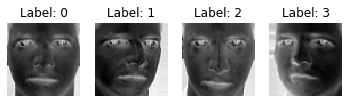

In [19]:
#Visualizando algumas imagens da base de dados
images_e_labels = list(zip(faces_data.images, faces_data.target))
for indice, (image, label) in enumerate(images_e_labels[:4]):
    plt.subplot(2, 4, indice+1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' %indice)

In [20]:
#Gera X e Y
X = faces_data.data
Y = faces_data.target

In [21]:
#Formato de X e Y
print(X.shape, Y.shape)

(400, 4096) (400,)


In [22]:
#Divisão em dados de treino e de teste
#Aqui utilizou-se a função train_test_split para a divisão dos dados de treino e teste (70% - 30%), essa função realiza a divisão dos dados
#de forma aleatória.
X_treino, testeData, Y_treino, testeLabels = train_test_split(X,Y, test_size = 0.30, random_state = 101)
print(X_treino.shape, Y_treino.shape)
print(testeData.shape, testeLabels.shape)

(280, 4096) (280,)
(120, 4096) (120,)


In [23]:
#Divisão dos dados de treino em dados de treino e dados de validação (90% - 10%) (melhora a precisão do modelo)
treinoData, validaData, treinoLabels, validaLabels = train_test_split(X_treino, Y_treino, test_size = 0.1, random_state = 84)
print(treinoData.shape, treinoLabels.shape)
print(validaData.shape, validaLabels.shape)

(252, 4096) (252,)
(28, 4096) (28,)


In [24]:
#A biblioteca do scikit-learn permite que seja possível encontrar o melhor valor de k para utilizar o classificador K-NN, 
#dessa forma, iremos buscar pelo melhor valor de k

#define um range de valores de k para testar (1 até 20)
k_valores = range(1, 30, 1)

#lista vazia para receber as acurácias
acuracias = []

#Realiza o teste de cada um dos valores de k
for k in k_valores:
    modeloKNN = KNeighborsClassifier(metric='euclidean',n_neighbors = k)
    modeloKNN.fit(treinoData, treinoLabels)
    
    score = modeloKNN.score(validaData, validaLabels)
    print("Para k = %d, a acurácia é = %.2f%%" %(k, score*100))
    acuracias.append(score)

Para k = 1, a acurácia é = 85.71%
Para k = 2, a acurácia é = 85.71%
Para k = 3, a acurácia é = 89.29%
Para k = 4, a acurácia é = 82.14%
Para k = 5, a acurácia é = 78.57%
Para k = 6, a acurácia é = 71.43%
Para k = 7, a acurácia é = 71.43%
Para k = 8, a acurácia é = 60.71%
Para k = 9, a acurácia é = 53.57%
Para k = 10, a acurácia é = 53.57%
Para k = 11, a acurácia é = 50.00%
Para k = 12, a acurácia é = 42.86%
Para k = 13, a acurácia é = 39.29%
Para k = 14, a acurácia é = 39.29%
Para k = 15, a acurácia é = 46.43%
Para k = 16, a acurácia é = 50.00%
Para k = 17, a acurácia é = 46.43%
Para k = 18, a acurácia é = 39.29%
Para k = 19, a acurácia é = 32.14%
Para k = 20, a acurácia é = 32.14%
Para k = 21, a acurácia é = 32.14%
Para k = 22, a acurácia é = 32.14%
Para k = 23, a acurácia é = 32.14%
Para k = 24, a acurácia é = 32.14%
Para k = 25, a acurácia é = 32.14%
Para k = 26, a acurácia é = 28.57%
Para k = 27, a acurácia é = 28.57%
Para k = 28, a acurácia é = 28.57%
Para k = 29, a acurácia é = 2

In [25]:
# Obtendo o valor de k que apresentou a maior acurácia
#Pega exatamente o maior valor de k.
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (k_valores[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 3 alcançou a mais alta acurácia de 89.29% nos dados de validação!


In [26]:
#Como visto acima o valor de k que apresentou a melhor acurácia foi k = 3.
#Criando o modelo com valor de k = 3. 

modelo = KNeighborsClassifier(metric='euclidean',n_neighbors = 3)

In [27]:
#Treinando o modelo
modelo.fit(treinoData, treinoLabels)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [28]:
#Previsões com os dados de teste
previsoes = modelo.predict(testeData)

print("Avaliação do modelo dos dados de teste")
print(classification_report(testeLabels, previsoes))

Avaliação do modelo dos dados de teste
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      0.86      0.92         7
           2       0.50      1.00      0.67         1
           3       0.60      1.00      0.75         3
           4       0.33      1.00      0.50         2
           5       1.00      1.00      1.00         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.33      1.00      0.50         1
          13       1.00      1.00      1.00         4
          14       0.75      1.00      0.86         3
          15       1.00      0.50      0.67         4
          16       0.00      0.00      0.0

Espera-se que a imagem seja: 38


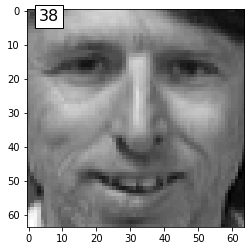

Espera-se que a imagem seja: 19


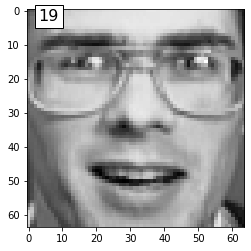

Espera-se que a imagem seja: 22


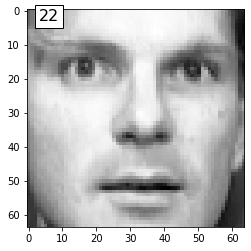

Espera-se que a imagem seja: 29


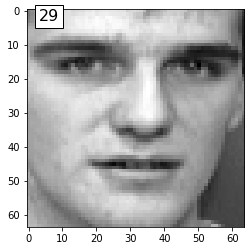

Espera-se que a imagem seja: 20


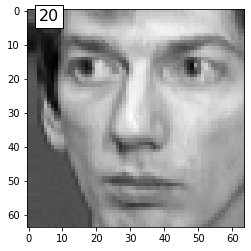

Espera-se que a imagem seja: 26


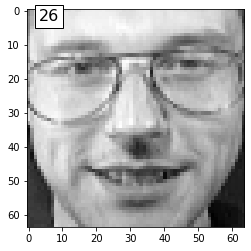

Espera-se que a imagem seja: 37


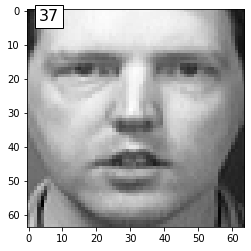

Espera-se que a imagem seja: 4


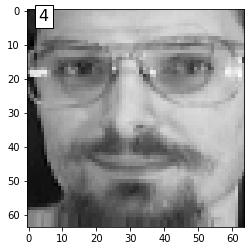

Espera-se que a imagem seja: 27


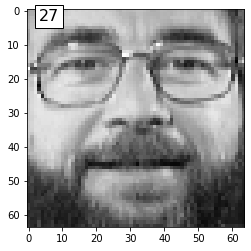

Espera-se que a imagem seja: 23


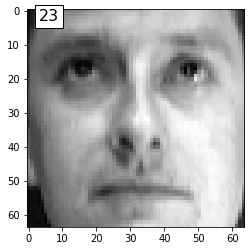

In [30]:
#Fazendo previsões com o modelo treinado usando dados de teste

for i in np.random.randint(0, high=len(testeLabels), size=(10,)):
         
    # Obtém uma imagem e faz a previsão
    image = testeData[i]
    previsao = modelo.predict([image])[0]
         
    # Mostra as previsões
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((64,64))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(previsao,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("Espera-se que a imagem seja: {}".format(previsao))
    plt.show()

In [31]:
#Validação Cruzada
#A validação cruzada permite que o modelo teste várias vezes para avaliarmos como o modelo funcionará em dados não vistos.
#Sendo assim, para o problema em questão utilizaremos o valor 5 para validação cruzada. 
#Em que, o conjunto de dados será dividido em 5 grupos e o modelo será treinado e testado 5 vezes separados para que cada
#grupo tenha a chance de ser o conjunto de teste.
cv_scores=cross_val_score(modelo, X, Y, cv=5)
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

[0.8625 0.9125 0.8625 0.925  0.8375]
cv_scores mean: 0.8800000000000001


Como pode ser visto na linha anterior, usando validação cruzada a pontuação média é de cerca de 88%. Essa é uma representação mais precisa de como o modelo irá funcionar em dados não vistos. Observa-se que o modelo treinado com k = 3, apresenta uma acurácia de 81%.

Referências Bibliográficas:

https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py

https://www.ibm.com/topics/knn